In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
 
data = pd.read_csv('CrimesOnWomenData.csv' )

# head of the data
print(data.head(n=10))


   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0
5           5                GOA  2001    12     6    2    17     7    11   0
6           6            GUJARAT  2001   286   857   67   756   111  3667   0
7           7            HARYANA  2001   398   297  285   478   401  1513   0
8           8   HIMACHAL PRADESH  2001   124   105   10   310    14   317   0
9           9    JAMMU & KASHMIR  2001   169   504   13   622   288    50   0


In [2]:
# Calculate major moments for numerical columns
moments = {}
numerical_columns = ['Rape', 'K&A', 'DD']  # Add other numerical columns if applicable

for col in numerical_columns:
    moments[col] = {
        'Mean': data[col].mean(),
        'Median': data[col].median(),
        'Standard Deviation': data[col].std(),
        'Skewness': data[col].skew(),
        'Kurtosis': data[col].kurt()
    }

# Display major moments
print("Statistical Moments:")
for col, stats in moments.items():
    print(f"\nColumn: {col}")
    for moment, value in stats.items():
        print(f"  {moment}: {value:.2f}")

# Correlation matrix
correlation_matrix = data[numerical_columns].corr()

correlation_matrix



print(data[numerical_columns].describe())


Statistical Moments:

Column: Rape
  Mean: 727.86
  Median: 348.50
  Standard Deviation: 977.02
  Skewness: 2.28
  Kurtosis: 6.65

Column: K&A
  Mean: 1134.54
  Median: 290.00
  Standard Deviation: 1993.54
  Skewness: 3.13
  Kurtosis: 12.51

Column: DD
  Mean: 215.69
  Median: 29.00
  Standard Deviation: 424.93
  Skewness: 3.37
  Kurtosis: 12.52
              Rape           K&A           DD
count   736.000000    736.000000   736.000000
mean    727.855978   1134.542120   215.692935
std     977.024945   1993.536828   424.927334
min       0.000000      0.000000     0.000000
25%      35.000000     24.750000     1.000000
50%     348.500000    290.000000    29.000000
75%    1069.000000   1216.000000   259.000000
max    6337.000000  15381.000000  2524.000000


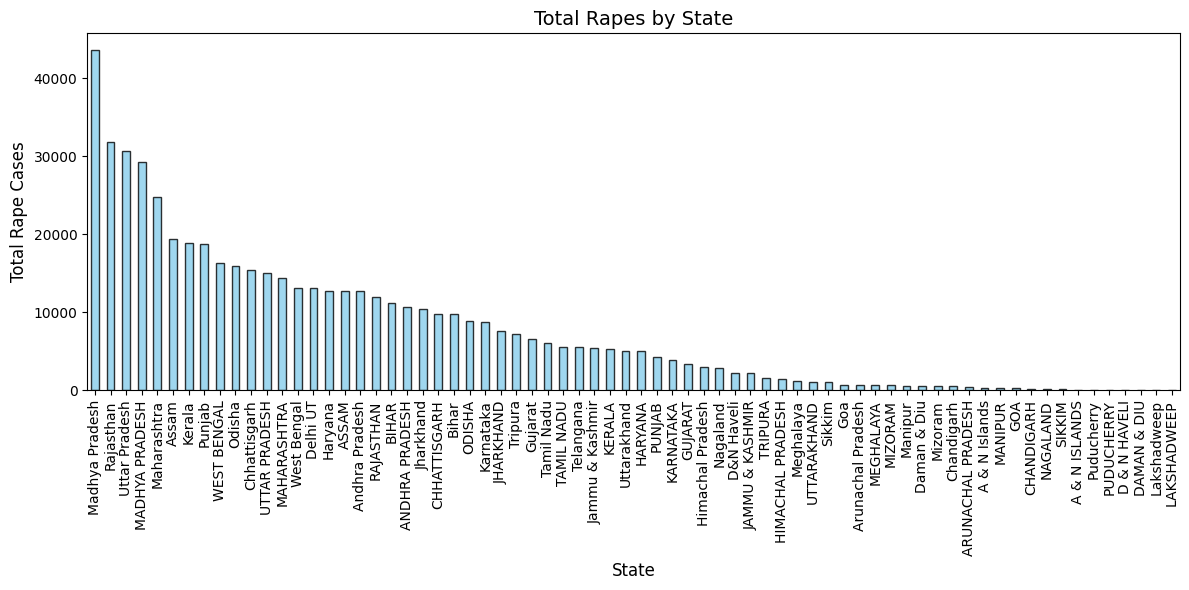

In [3]:
# Aggregate the data by state to calculate the total number of rapes
total_rape_by_state = data.groupby('State')['Rape'].sum()

# Function to create a bar chart
def create_bar(data, title, xlabel, ylabel):
    """
    Creates a bar chart comparing a numerical value across categories.

    """
    data.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black', alpha=0.8)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Create a bar chart for total rapes by state
create_bar(
    data=total_rape_by_state,
    title='Total Rapes by State',
    xlabel='State',
    ylabel='Total Rape Cases'
)


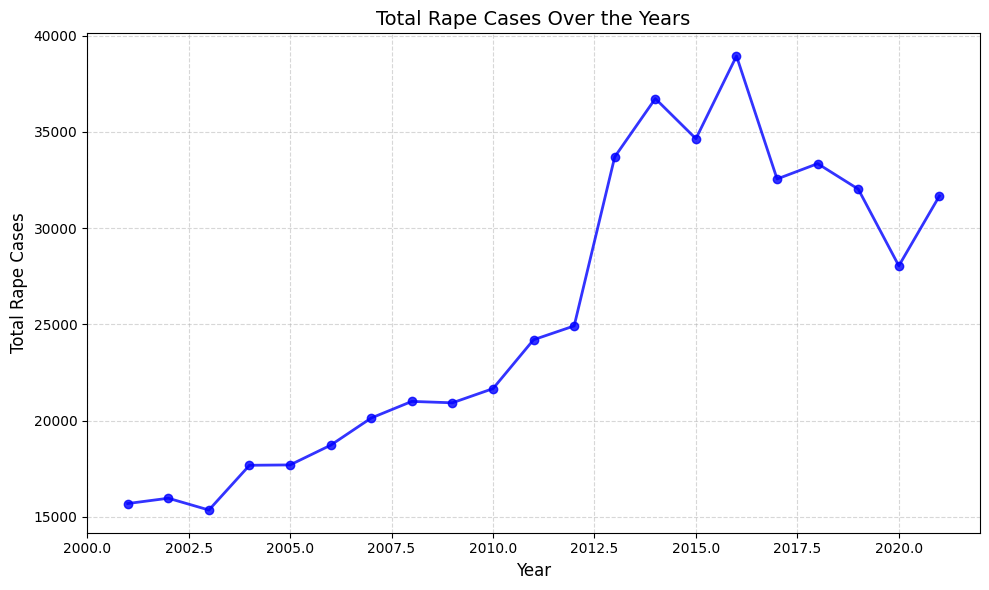

In [4]:
# Aggregate the data by year to calculate the total number of rapes for all states
total_rape_by_year = data.groupby('Year')['Rape'].sum()

# Function to create a line graph
def create_line(data, title, xlabel, ylabel):
    """
    Creating a line graph showing trends over time.

   
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values, marker='o', color='blue', linestyle='-', linewidth=2, alpha=0.8)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Create a line graph for total rapes by year
create_line(
    data=total_rape_by_year,
    title='Total Rape Cases Over the Years',
    xlabel='Year',
    ylabel='Total Rape Cases'
)


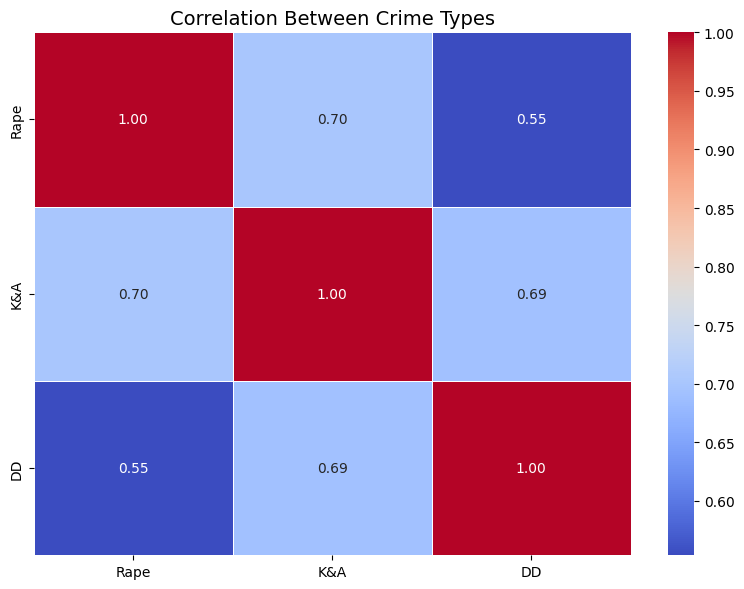

In [5]:
# Compute the correlation matrix for numerical columns
correlation_matrix = data[['Rape', 'K&A', 'DD']].corr()

# Function to create a heatmap
def create_heatmap(data, title):
    """
    Creates a heatmap to visualize the correlation matrix.

   
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Create a heatmap for the correlation matrix
create_heatmap(
    data=correlation_matrix,
    title='Correlation Between Crime Types'
)


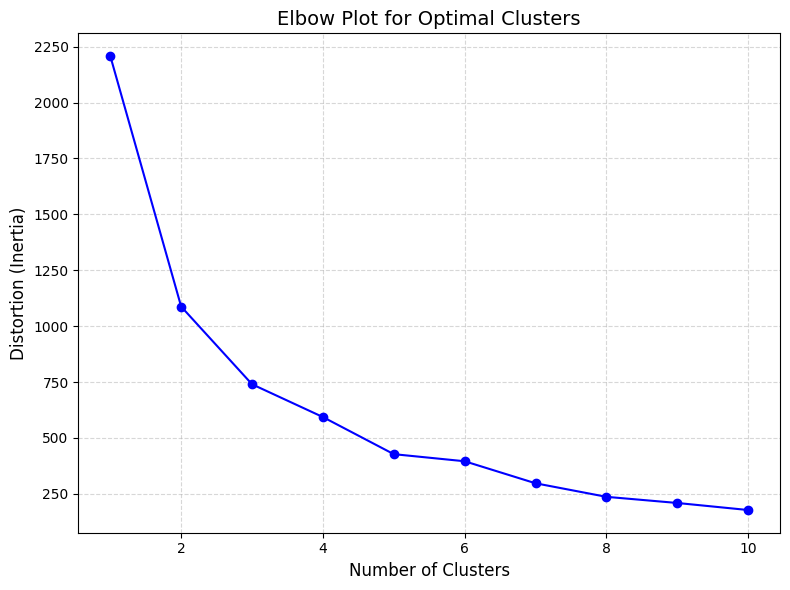

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Prepare the data for clustering
numerical_columns = ['Rape', 'K&A', 'DD']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Function to create an elbow plot
def create_elbow(data, max_clusters=10):
    """
    Creates an elbow plot to determine the optimal number of clusters for KMeans.

    Parameters:
        data (np.array): Scaled numerical data for clustering.
        max_clusters (int): Maximum number of clusters to test.
    """
    distortions = []
    cluster_range = range(1, max_clusters + 1)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, distortions, marker='o', linestyle='-', color='blue')
    plt.title('Elbow Plot for Optimal Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion (Inertia)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Create an elbow plot
create_elbow(scaled_data)


c:\users\ashraf\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


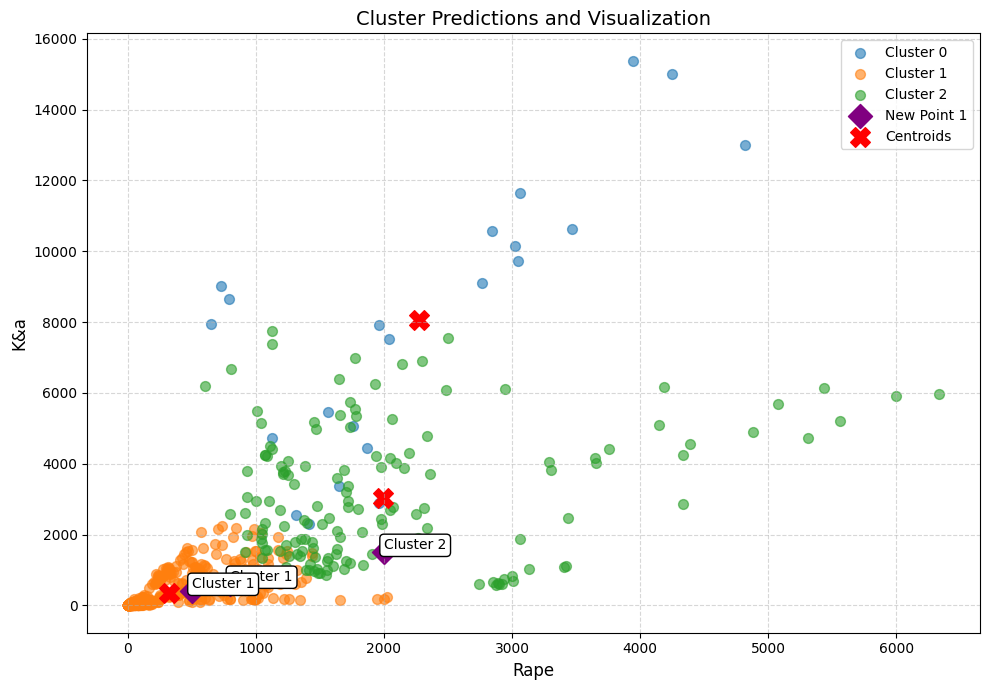

Predicted Clusters for New Points: [1 2 1]


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Step 1: Select the necessary columns
columns_to_cluster = ['Rape', 'K&A', 'DD']
data_cluster = data[columns_to_cluster].dropna()

# Step 2: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_cluster)

# Step 3: Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_cluster['cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Define new points for prediction
predicted_points = np.array([[800, 600, 100], [2000, 1500, 300], [500, 400, 50]])
normalized_new_points = scaler.transform(predicted_points)
predictions = kmeans.predict(normalized_new_points)

# Step 5: Visualize Clustering and Predictions
def visualize_clusters(data, kmeans_model, new_points, x_column, y_column):
    """
    Visualizes clusters with predicted new points and classification of datapoints.

   
    """
    plt.figure(figsize=(10, 7))
    
    # Plot each cluster
    for cluster in range(kmeans_model.n_clusters):
        clustered_points = data[data['cluster'] == cluster]
        plt.scatter(
            clustered_points[x_column],
            clustered_points[y_column],
            label=f'Cluster {cluster}',
            alpha=0.6,
            s=50
        )

    # Plot new points
    for i, (x, y) in enumerate(new_points[:, :2]):  # Use the first two dimensions for visualization
        plt.scatter(
            x, y, color='purple', marker='D', s=150, label=f'New Point {i+1}' if i == 0 else ""
        )
        plt.text(
            x, y, f'Cluster {predictions[i]}', fontsize=10, ha='left', va='bottom', color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )

    # Add centroids
    centroids = scaler.inverse_transform(kmeans_model.cluster_centers_)
    x_index = columns_to_cluster.index(x_column)
    y_index = columns_to_cluster.index(y_column)
    plt.scatter(
        centroids[:, x_index],
        centroids[:, y_index],
        color='red',
        marker='X',
        s=200,
        label='Centroids'
    )

    # Add labels and title
    plt.title('Cluster Predictions and Visualization', fontsize=14)
    plt.xlabel(x_column.capitalize(), fontsize=12)
    plt.ylabel(y_column.capitalize(), fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
# Visualize clustering and predictions 
visualize_clusters(data_cluster, kmeans, new_points=predicted_points, x_column='Rape', y_column='K&A')

# Output predictions
print(f"Predicted Clusters for New Points: {predictions}")


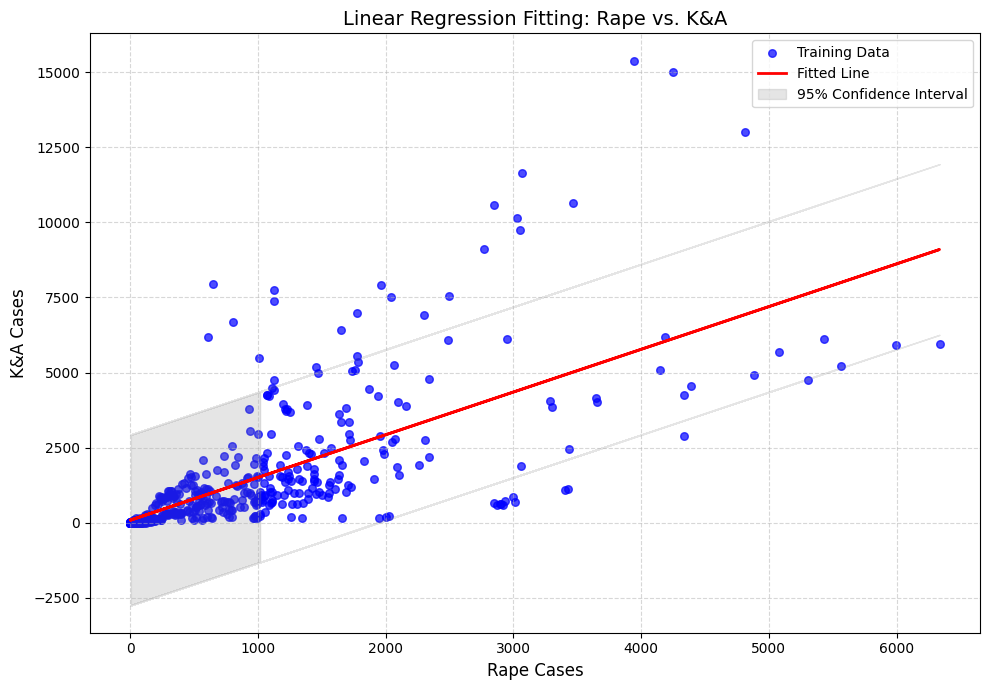

Model Coefficients:
Intercept: 86.02726744408301
Coefficient for Rape: 1.4213273140241307


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def linear_regression_with_ci(data, x_column, y_column, test_size=0.2, random_state=42):
    """
    linear regression, calculates confidence intervals, and visualizes the results.
    
    
    """
    # Prepare the data
    X = data[[x_column]]
    y = data[y_column]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions for the training set
    y_pred_train = model.predict(X_train)

    # Confidence Interval Calculation
    residuals = y_train - y_pred_train
    std_error = np.std(residuals)
    ci_upper = y_pred_train + 1.96 * std_error
    ci_lower = y_pred_train - 1.96 * std_error

    # Visualization of Fitted Line with Confidence Intervals
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, label='Training Data', alpha=0.7, color='blue', s=30)
    plt.plot(X_train, y_pred_train, color='red', label='Fitted Line', linewidth=2)
    plt.fill_between(X_train.squeeze(), ci_lower, ci_upper, color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.title(f'Linear Regression Fitting: {x_column} vs. {y_column}', fontsize=14)
    plt.xlabel(f'{x_column} Cases', fontsize=12)
    plt.ylabel(f'{y_column} Cases', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Print results
    print("Model Coefficients:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficient for {x_column}: {model.coef_[0]}")

    # Return the trained model and statistics
    return model, std_error

# Call the function with the dataset
model, std_error = linear_regression_with_ci(data, x_column='Rape', y_column='K&A')



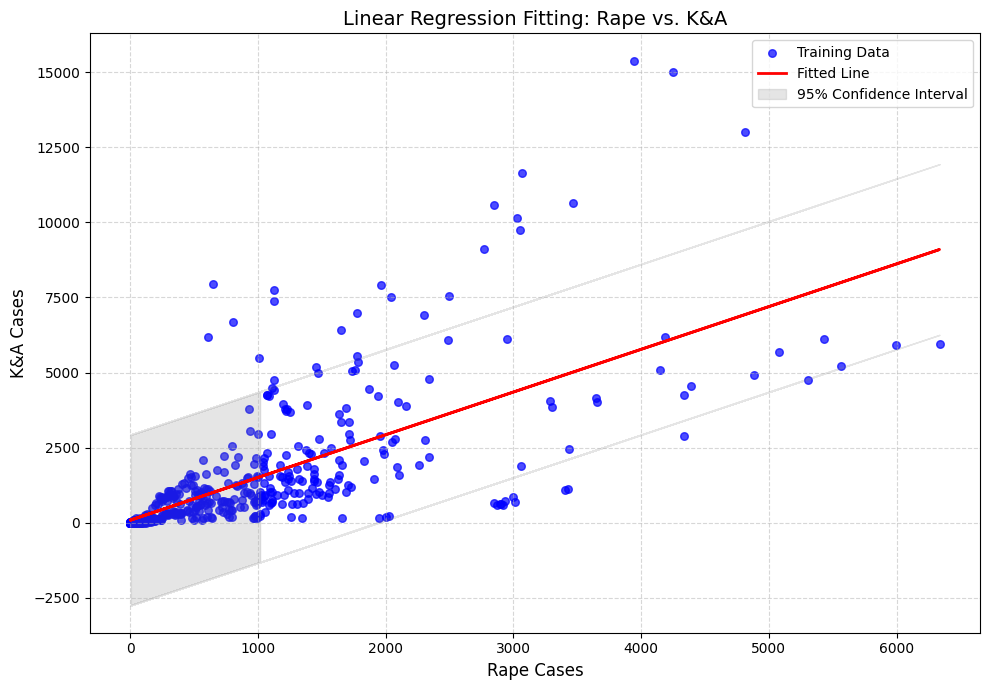

Model Coefficients:
Intercept: 86.02726744408301
Coefficient for Rape: 1.4213273140241307


c:\users\ashraf\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


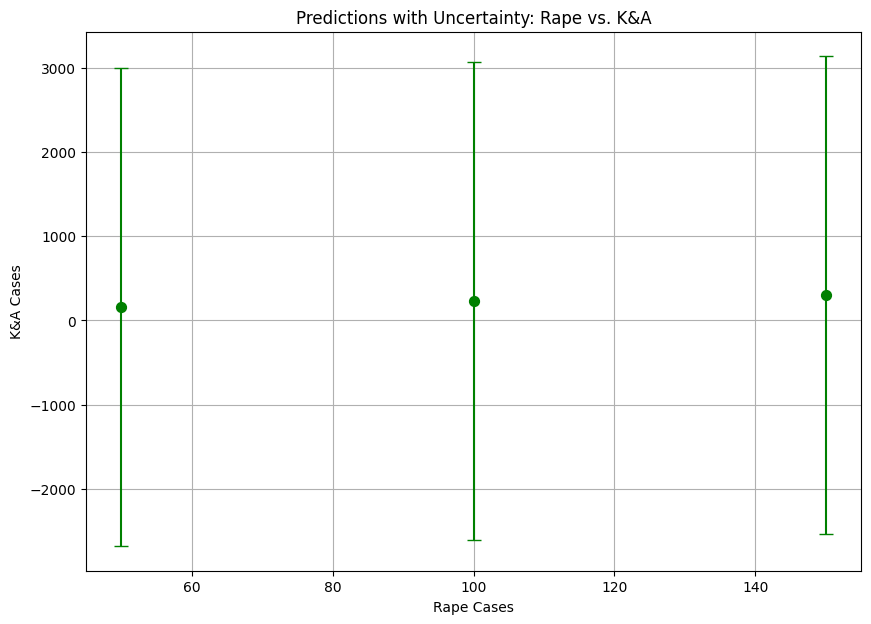

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def linear_regression_with_ci(data, x_column, y_column, test_size=0.2, random_state=42):
    """
    Linear regression, calculates confidence intervals, and visualizes the results.

    
    """

    # Prepare the data
    X = data[[x_column]]
    y = data[y_column]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions for the training set
    y_pred_train = model.predict(X_train)

    # Confidence Interval Calculation
    residuals = y_train - y_pred_train
    std_error = np.std(residuals)

    # Visualization of Fitted Line with Confidence Intervals
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, label='Training Data', alpha=0.7, color='blue', s=30)
    plt.plot(X_train, y_pred_train, color='red', label='Fitted Line', linewidth=2)
    plt.fill_between(X_train.squeeze(), y_pred_train - 1.96 * std_error, y_pred_train + 1.96 * std_error, color='gray', alpha=0.2, label='95% Confidence Interval')
    plt.title(f'Linear Regression Fitting: {x_column} vs. {y_column}', fontsize=14)
    plt.xlabel(f'{x_column} Cases', fontsize=12)
    plt.ylabel(f'{y_column} Cases', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Print results
    print("Model Coefficients:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficient for {x_column}: {model.coef_[0]}")

    return model, std_error, X_train, y_train, y_pred_train, x_column, y_column

# Call the function with your data
model, std_error, X_train, y_train, y_pred_train, x_column, y_column = linear_regression_with_ci(data, x_column='Rape', y_column='K&A')

# Define new data points for prediction
new_points = np.array([[50], [100], [150]])

# Make predictions and calculate confidence intervals
predictions = model.predict(new_points)
prediction_ci_upper = predictions + 1.96 * std_error
prediction_ci_lower = predictions - 1.96 * std_error

# Visualization of Predictions with Uncertainty
plt.figure(figsize=(10, 7))
plt.scatter(new_points, predictions, label='Predictions', color='green', s=50)
plt.errorbar(new_points.squeeze(), predictions, yerr=1.96 * std_error, fmt='o', color='green', capsize=5)
plt.xlabel(f'{x_column} Cases')
plt.ylabel(f'{y_column} Cases')
plt.title(f'Predictions with Uncertainty: {x_column} vs. {y_column}')
plt.grid(True)
plt.show()